In [1]:
import os
import sys
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from matplotlib import pyplot as plt
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
from ooipy.request import hydrophone_request

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
start_time = datetime.datetime(2017,3,10,0,0,0)
end_time = datetime.datetime(2017,3,10,0,5,0)
node = 'PC01A'

#print('single thread function: \n')
#data1 = hydrophone.__get_acoustic_data_archive(start_time, end_time, node)
#print(data1.stats)

#print('----------------------------------------------------------------- \n')

print('multi thread function: \n')
data1 = hydrophone_request.get_acoustic_data(start_time, end_time, node)
print(data1.stats)

multi thread function: 

         network: OO
         station: HYVM2
        location: PC01A
         channel: YDH
       starttime: 2017-03-09T23:59:59.999999Z
         endtime: 2017-03-10T00:04:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9217, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37752832})
      processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2017, 3, 10, 0, 5)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 3, 10, 0, 0))']


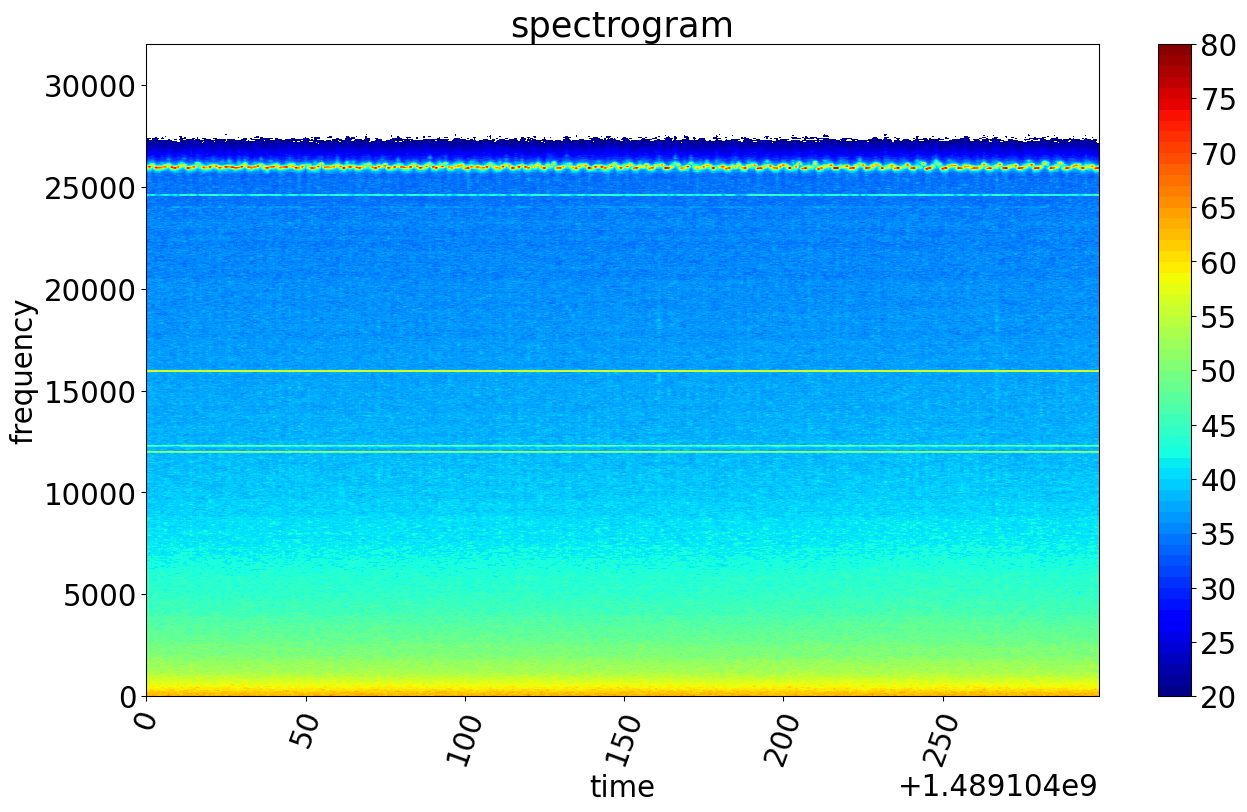

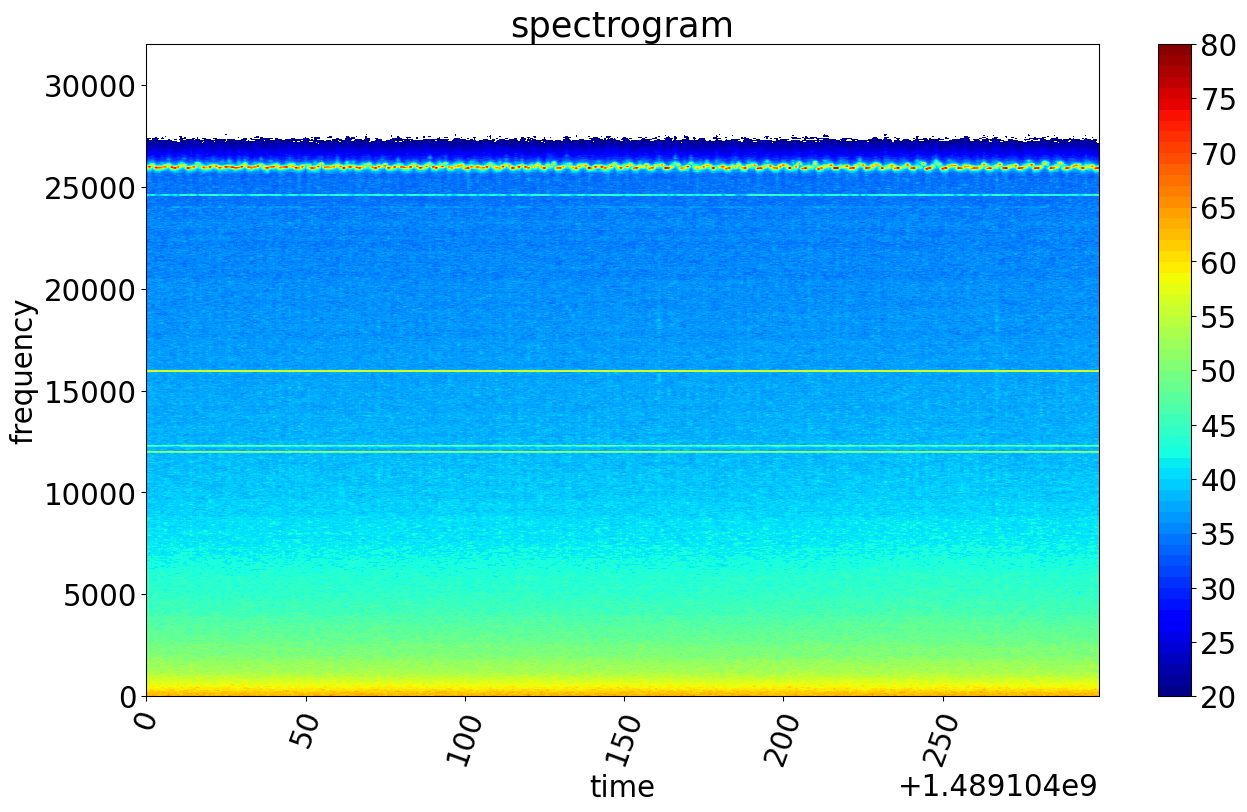

/Users/John/University-of-Washington/Ocean_Acoustics/Code/ooipy/ooipy/hydrophone/basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


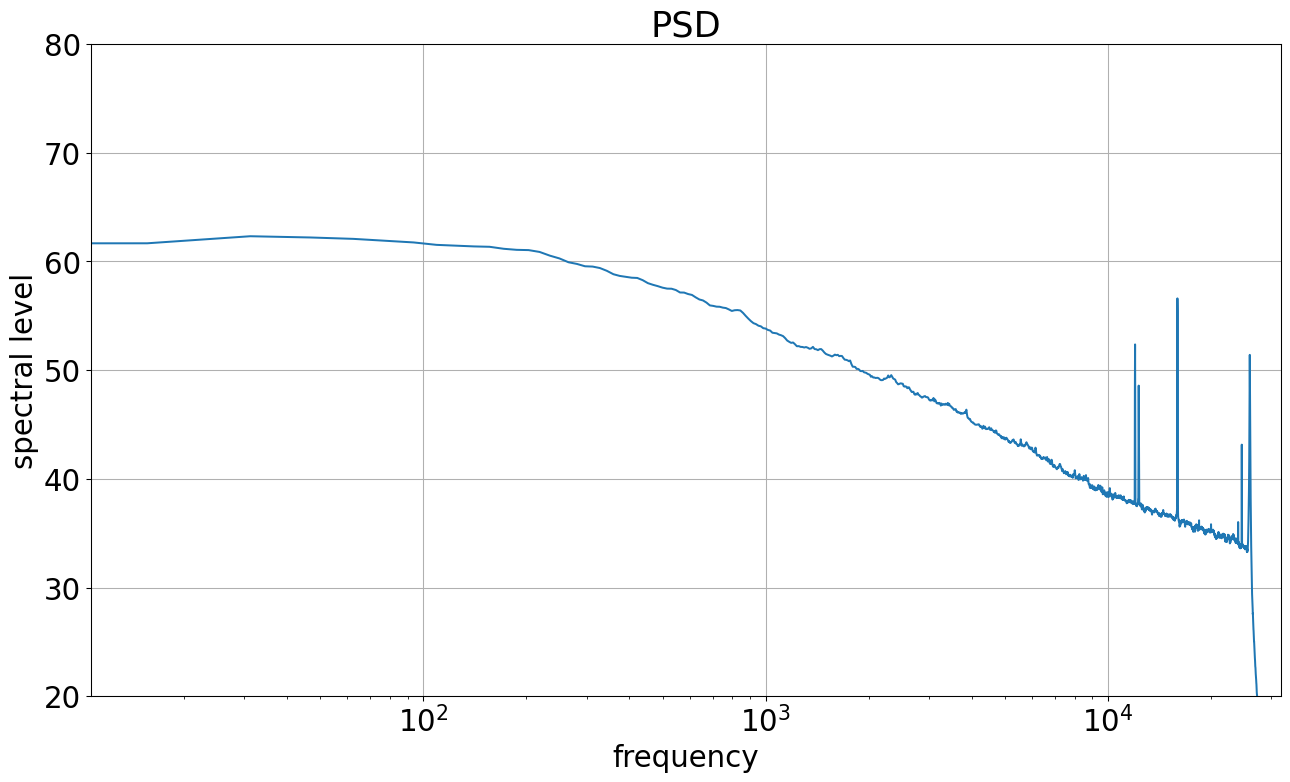

/Users/John/University-of-Washington/Ocean_Acoustics/Code/ooipy/ooipy/hydrophone/basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


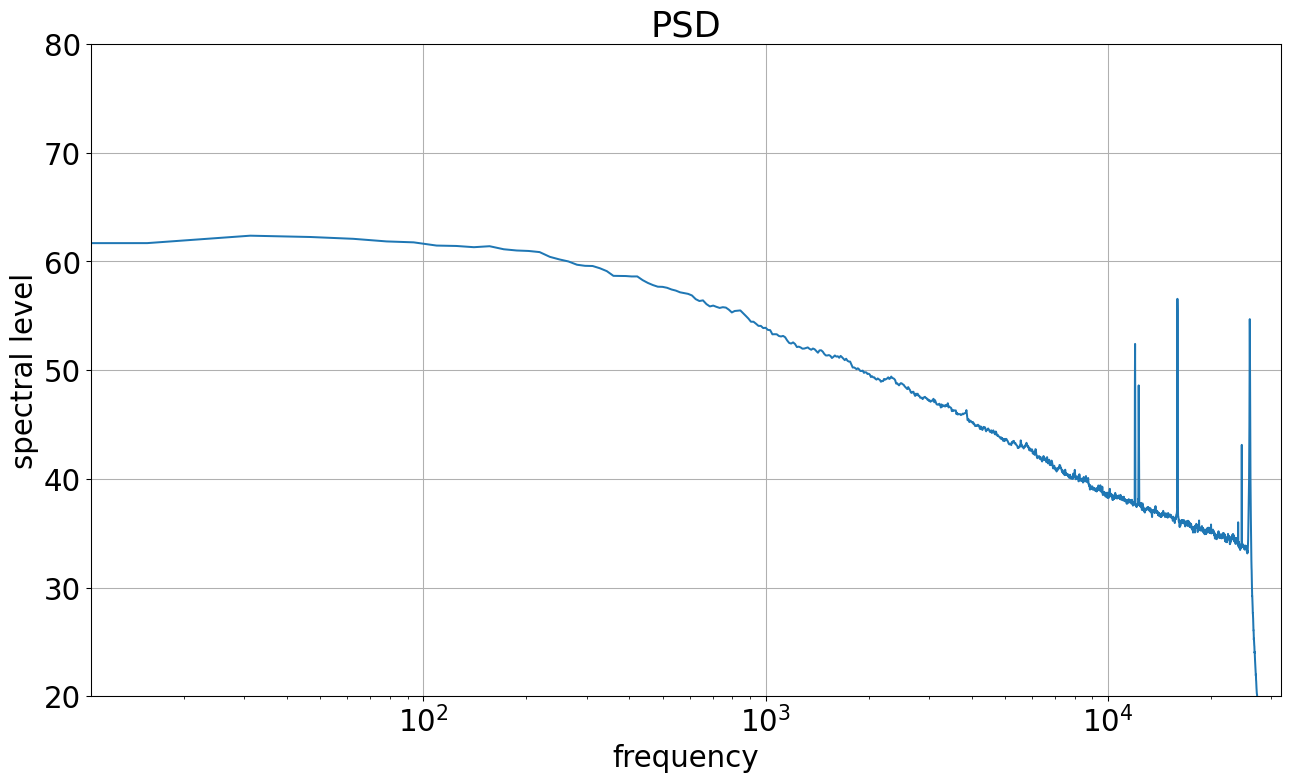

/Users/John/University-of-Washington/Ocean_Acoustics/Code/ooipy/ooipy/hydrophone/basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


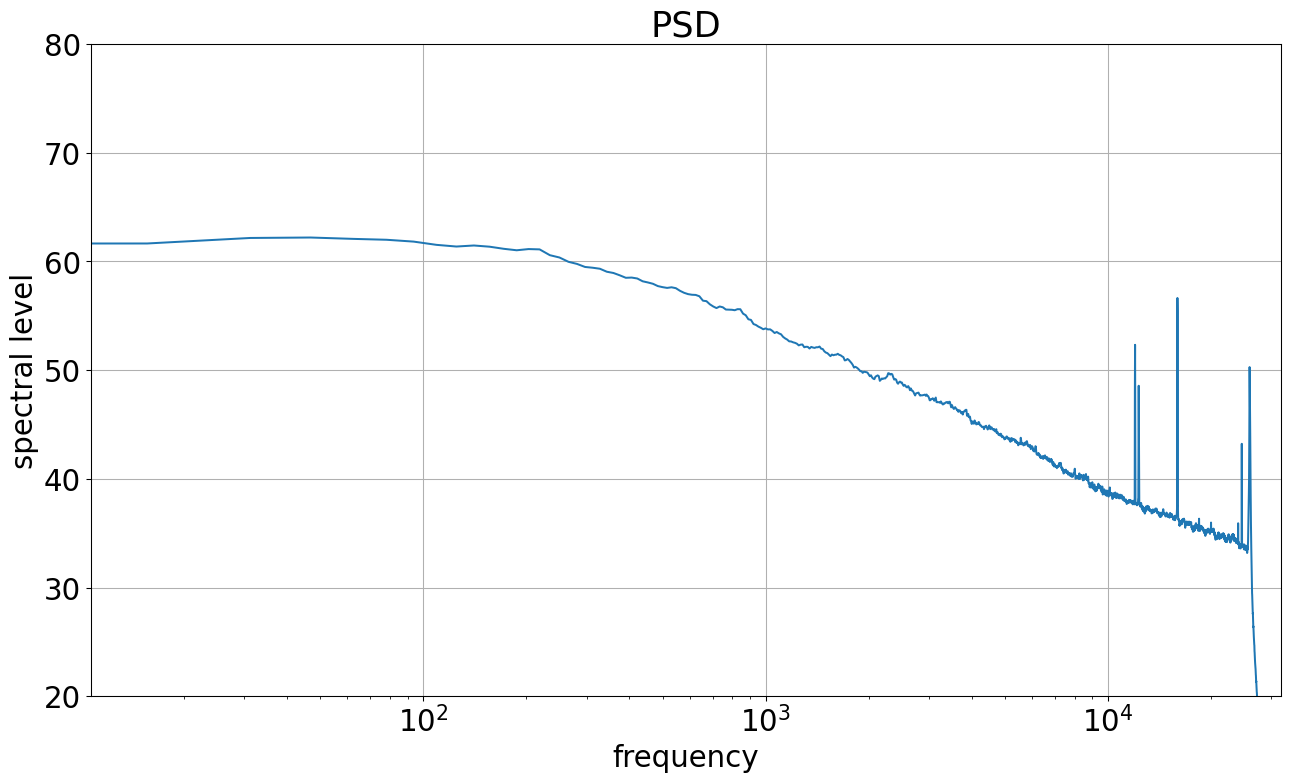

In [6]:
spec = data1.compute_spectrogram(avg_time=1.0)
spec.visualize()
#print(spec.time, spec.freq, spec.values)

spec_mp = data1.compute_spectrogram_mp(n_process = 3, avg_time=1.0)
#print(spec_mp.time, spec_mp.freq, spec_mp.values)
spec_mp.visualize()

psd = data1.compute_psd_welch()
#print(psd.freq, spec.values)
psd.visualize()

psd_mp = data1.compute_psd_welch_mp(split=150, n_process=2)
#print(psd_mp)
psd_mp[0].visualize()
psd_mp[1].visualize()

# Debugging Spectrograms for Low Frequency Hydrophones


In [4]:
start_time = datetime.datetime(2017,3,10,0,0,0)
end_time = datetime.datetime(2017,3,10,0,5,0)
node = 'Central_Caldera'

data1 = hydrophone_request.get_acoustic_data_LF(start_time, end_time, node)
print(data1.stats)

         network: OO
         station: AXCC1
        location: Central_Caldera
         channel: HDH
       starttime: 2017-03-10T00:00:00.000000Z
         endtime: 2017-03-10T00:05:00.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 60001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 60, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 245760})


plt.plot(10*np.log10(data1.data/1e-6))

In [9]:
np.log10(0)

/Users/John/opt/anaconda3/envs/ooi/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

In [52]:
%time
start_time = datetime.datetime(2017,3,10,0,0,0)
end_time = datetime.datetime(2017,3,10,1,0,0)
node = 'Axial_Base'

data1 = hydrophone_request.get_acoustic_data_LF(start_time, end_time, node, zero_mean=True)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
http://service.iris.edu/irisws/timeseries/1/query?net=OO&sta=AXBA1&cha=HDH&start=2017-03-10T00:00:00&end=2017-03-10T01:00:00&demean=true&format=miniseed&loc=--&correct=true


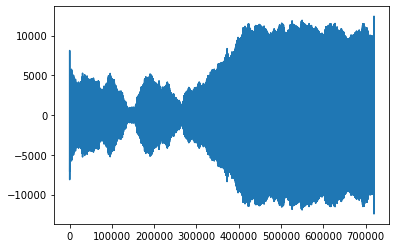

In [53]:
plt.plot(data1.data)

# Imorted Cells from Demo notebook

In [ ]:
# test lin/log scale option in PSD estimate
hyd_data.compute_psd_welch(scale='log')
psd_log = hyd_data.psd.values

hyd_data.compute_psd_welch(scale='lin')
psd_lin, f = hyd_data.psd.values, hyd_data.psd.freq / 1000


fig, ax = plt.subplots(figsize=(22,14), dpi=100)
plt.plot(f, 10*np.log10(psd_lin), label='lin', color='b')
plt.plot(f, psd_log, label='log', color='r')
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1,25)
plt.ylim(25,70)
plt.legend()

In [ ]:
# test interpolation option in PSD estimates
ooi1.compute_psd_welch().psd.values
psd, f = ooi1.psd.values, ooi1.psd.freq / 1000

ooi1.compute_psd_welch(interpolate=1.0)
psd_interpolated, f_interpolated = ooi1.psd.values, ooi1.psd.freq / 1000


fig, ax = plt.subplots(figsize=(22,14), dpi=100)
plt.plot(f_interpolated, psd_interpolated, label='interpolated',color='b')
plt.plot(f, psd, label='original',color='r')
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1,25)
plt.ylim(25,70)
plt.legend()